# <FONT COLOR="red">***NEURAL NETWORK FOR REGRESSION WITH KERAS***</FONT>
---
---
The official documentation of keras can be found at: https://keras.io/api/

Keras is one of the most popular and widely used deep learning libraries in the field of neural networks. It is an open-source library written in Python that provides a friendly, high-level interface for building, training, and evaluating neural network models quickly and efficiently.

In [1]:
# IMPORT MODEL
import keras

# IMPORT DATASET
from sklearn.datasets import fetch_california_housing

# IMPORT PROCESSING LIBRARIES
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# IMPORT COMMON LIBRARIES
import numpy as np
import pandas as pd

# IMPORT GRAPH LIBRARIES
import matplotlib.pyplot as plt

In [2]:
# LOAD DATASET
housing = fetch_california_housing()

In [4]:
# CREATE TRAIN, TEST AND VALIDATE SETS
X_train_full, X_test, y_train_full, y_test = train_test_split(
  housing.data,
  housing.target
)
X_train, X_valid, y_train, y_valid = train_test_split(
  X_train_full,
  y_train_full
)

# DISPLAY SETS
print(f'X_train: {X_train.shape}')
print(f'X_test:  {X_test.shape}')
print(f'X_valid: {X_valid.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test:  {y_test.shape}')
print(f'y_valid: {y_valid.shape}')

X_train: (11610, 8)
X_test:  (5160, 8)
X_valid: (3870, 8)
y_train: (11610,)
y_test:  (5160,)
y_valid: (3870,)


In [5]:
# SCALER DATA
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [7]:
# CREATE NEURAL NETWORK MODEL
model = keras.models.Sequential([
  keras.layers.Dense(
    30,
    activation='relu',
    input_shape=X_train.shape[1:]
  ),
  keras.layers.Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# COMPILE MODEL
model.compile(
  loss='mean_squared_error',
  optimizer='sgd',
  metrics=[
    keras.metrics.RootMeanSquaredError(),
    'mean_absolute_percentage_error'
  ]
)

In [9]:
# TRAIN MODEL
history = model.fit(
  X_train,
  y_train,
  epochs=10,
  validation_data=(X_valid, y_valid)
)

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.2394 - mean_absolute_percentage_error: 46.2650 - root_mean_squared_error: 1.4741 - val_loss: 0.4620 - val_mean_absolute_percentage_error: 30.5897 - val_root_mean_squared_error: 0.6797
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.4980 - mean_absolute_percentage_error: 30.2220 - root_mean_squared_error: 0.7054 - val_loss: 0.4258 - val_mean_absolute_percentage_error: 29.6941 - val_root_mean_squared_error: 0.6525
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4640 - mean_absolute_percentage_error: 27.9172 - root_mean_squared_error: 0.6811 - val_loss: 0.4004 - val_mean_absolute_percentage_error: 26.4321 - val_root_mean_squared_error: 0.6328
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4471 - mean_absolute_percentage_error: 26.8594 - root_mean_squared_error: 0.6685 - val_loss: 0.3887 - val_mean_absolute_percentage_error: 26.8423 - val_root_mean_squared_error: 0.6234
Epoch 5/10
363/3

<Axes: >

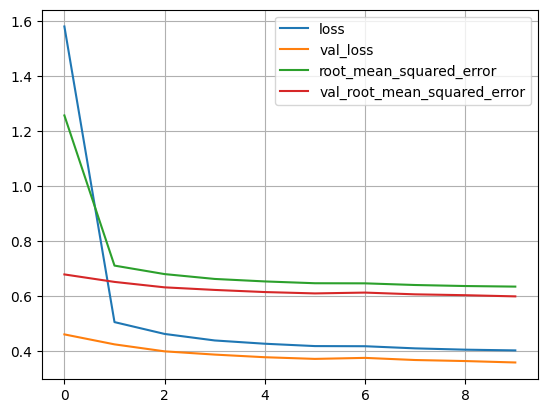

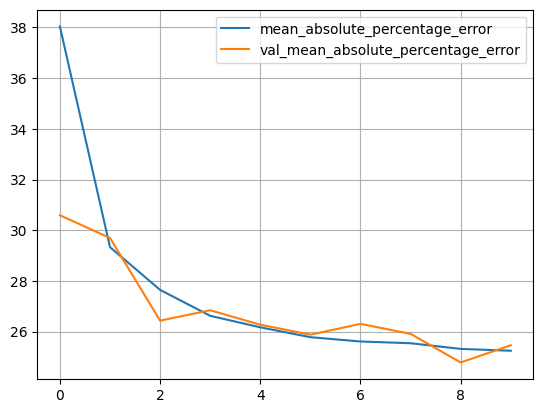

In [11]:
# GRAPH TRAIN HISTORY
df_history = pd.DataFrame(history.history)

df_history[[
  'loss',
  'val_loss',
  'root_mean_squared_error',
  'val_root_mean_squared_error'
]].plot(grid=True)

df_history[[
  'mean_absolute_percentage_error',
  'val_mean_absolute_percentage_error'
]].plot(grid=True)

In [12]:
# EVALUATE MODEL WITH TRAIN SET
loss, RMSE, MAPE = model.evaluate(X_train, y_train)
print('Evaluate model with train set')
print(f'Loss Train:                                  {loss}')
print(f'Root Mean Squared Error (RMSE) Train:        {RMSE}')
print(f'Mean Absolute Percentage Error (MAPE) Train: {MAPE}')

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3929 - mean_absolute_percentage_error: 24.9662 - root_mean_squared_error: 0.6268
Evaluate model with train set
Loss Train:                                  0.3980259299278259
Root Mean Squared Error (RMSE) Train:        0.6308929920196533
Mean Absolute Percentage Error (MAPE) Train: 25.161592483520508


In [13]:
# EVALUATE MODEL WITH VALIDATION SET
loss, RMSE, MAPE = model.evaluate(X_valid, y_valid)
print('Evaluate model with validation set')
print(f'Loss Validation:                                  {loss}')
print(f'Root Mean Squared Error (RMSE) Validation:        {RMSE}')
print(f'Mean Absolute Percentage Error (MAPE) Validation: {MAPE}')

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3774 - mean_absolute_percentage_error: 25.5260 - root_mean_squared_error: 0.6139
Evaluate model with validation set
Loss Validation:                                  0.36001890897750854
Root Mean Squared Error (RMSE) Validation:        0.6000157594680786
Mean Absolute Percentage Error (MAPE) Validation: 25.461183547973633


In [14]:
# EVALUATE MODEL WITH TEST SET
loss, RMSE, MAPE = model.evaluate(X_test, y_test)
print('Evaluate model with test set')
print(f'Loss Test:                                  {loss}')
print(f'Root Mean Squared Error (RMSE) Test:        {RMSE}')
print(f'Mean Absolute Percentage Error (MAPE) Test: {MAPE}')

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3836 - mean_absolute_percentage_error: 26.1059 - root_mean_squared_error: 0.6186
Evaluate model with test set
Loss Test:                                  0.4071458876132965
Root Mean Squared Error (RMSE) Test:        0.638079822063446
Mean Absolute Percentage Error (MAPE) Test: 26.1594181060791
